In [11]:
import pandas as pd
import matplotlib.pyplot as plt

stacked_chart = pd.read_csv('csv/orders.csv', sep=';')
stacked_chart = stacked_chart[['ip_address', 'customer_id', 'date_created_gmt']]
stacked_chart.columns = ['ip_address', 'customer_id', 'order_date']
display(stacked_chart.head())
display(stacked_chart.shape)
# Hitung frekuensi order berdasarkan ip_address dan customer_id
order_freq = stacked_chart.groupby(['ip_address', 'customer_id']).size().unstack(fill_value=0)

order_freq

,ip_address,customer_id,order_date
0,118.99.118.196,62,2025-05-08 22:36:36
1,118.99.118.196,63,2025-05-08 22:53:26
2,118.99.118.196,64,2025-05-08 22:56:25
3,118.99.118.196,65,2025-05-08 22:59:51
4,118.99.118.196,66,2025-05-08 23:02:06


(110, 3)

customer_id,14,15,16,19,20,21,22,23,24,25,...,100,101,102,103,104,105,106,107,108,109
ip_address,,,,,,,,,,,,,,,,,,,,,
103.154.110.177,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103.3.221.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114.10.137.72,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
118.99.118.196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118.99.64.211,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
180.242.232.29,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180.242.235.124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180.243.107.39,0,0,0,0,0,0,0,0,0,0,...,2,3,2,2,2,3,2,2,2,2
180.248.184.92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
stacked_chart.to_csv('stacked_chart.csv', index=False)
# df = pd.read_csv('stacked_chart.csv')
# df

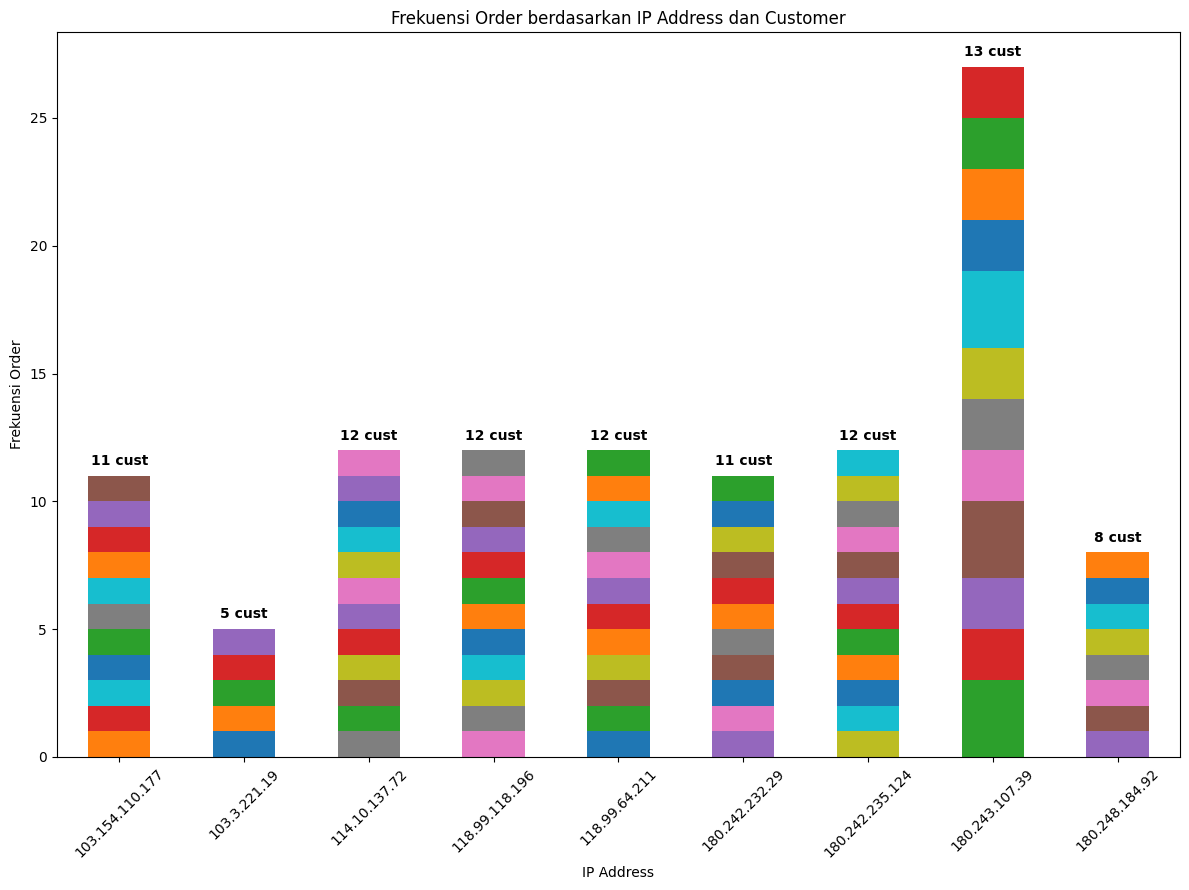

In [12]:
# Plot stacked bar chart (tetap pakai jumlah order)
ax = order_freq.plot(kind='bar', stacked=True, figsize=(12, 9), legend=False)

# Hitung jumlah customer unik per IP
unique_cust = order_freq.gt(0).sum(axis=1)

# Tambahkan jumlah customer di atas setiap bar
totals = order_freq.sum(axis=1)  # untuk tahu tinggi bar
for i, (cust, total) in enumerate(zip(unique_cust, totals)):
    ax.text(i, total + 0.3, f"{cust} cust", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel('Frekuensi Order')
plt.xlabel('IP Address')
plt.title('Frekuensi Order berdasarkan IP Address dan Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()